# Prever preço de diamantes com Árvore de Decisão

O conjunto de dados "**Diamonds**" do *seaborn* é frequentemente usado para estudos de regressão e contém variáveis categóricas e numéricas.<br>
Esse conjunto de dados tem informações sobre diamantes, incluindo o preço (que será a variável alvo para regressão), o quilate, a cor, a claridade, entre outras características.<br>
*Descrição das Colunas*:

- **carat**: Peso do diamante.
- **cut**: Qualidade do corte do diamante (Fair, Good, Very Good, Premium, Ideal).
- **color**: Cor do diamante, de J (menos valioso) a D (mais valioso).
- **clarity**: Claridade do diamante (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF).
- **depth**: Profundidade total do diamante como uma porcentagem da média do diâmetro.
- **table**: Largura da mesa do diamante como uma porcentagem da média do diâmetro.
- **price**: Preço do diamante (variável alvo).
- **x**: Comprimento em milímetros.
- **y**: Largura em milímetros.
- **z**: Profundidade em milímetros.


## import Bibliotecas

In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Fixar a seed para reprodutibilidade

In [4]:
np.random.seed(42)

## Carregar os dados

In [5]:
df = sns.load_dataset('diamonds')

## Informações básicas do DataFrame

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


## Quantidade de linhas e colunas

In [ ]:
df.shape

(53940, 10)

## Estatísticas descritivas

In [ ]:
display(df.describe())

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


# Análise Exploratória de Dados (EDA)

## Distribuição do target (preço)


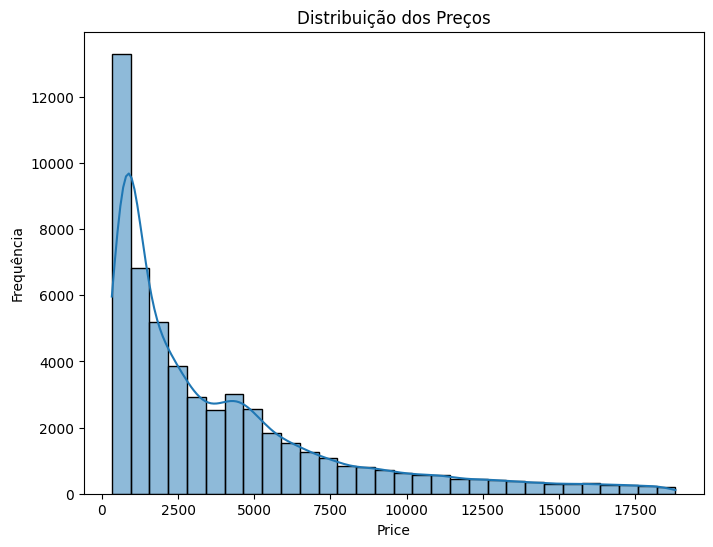

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribuição dos Preços')
plt.xlabel('Price')
plt.ylabel('Frequência')
plt.show()


## Análise das variáveis

### carat
#### tipo de dado

In [ ]:
print(df['carat'].dtype)

float64


#### valores unicos

In [ ]:
print(df['carat'].nunique())


273


#### distribuição

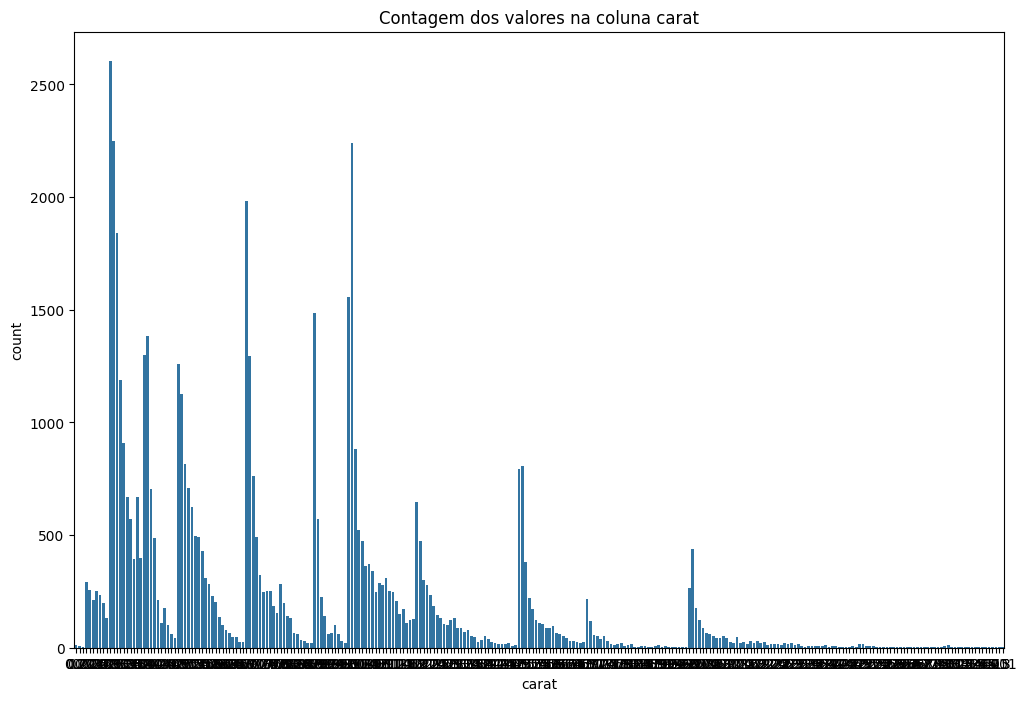

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='carat')
plt.title('Contagem dos valores na coluna carat')
plt.show()


#### histograma

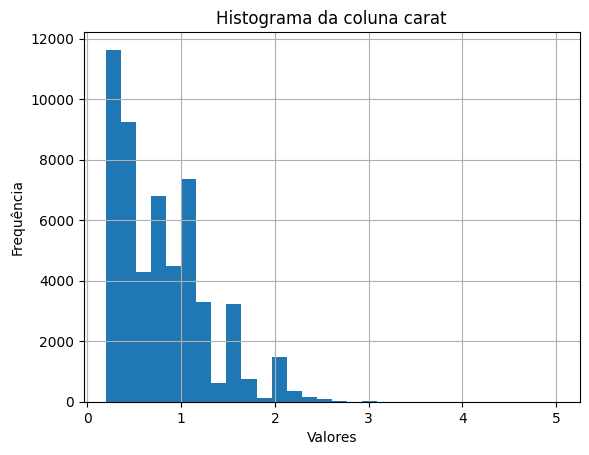

In [ ]:
df['carat'].hist(bins=30)
plt.title('Histograma da coluna carat')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

#### boxplot

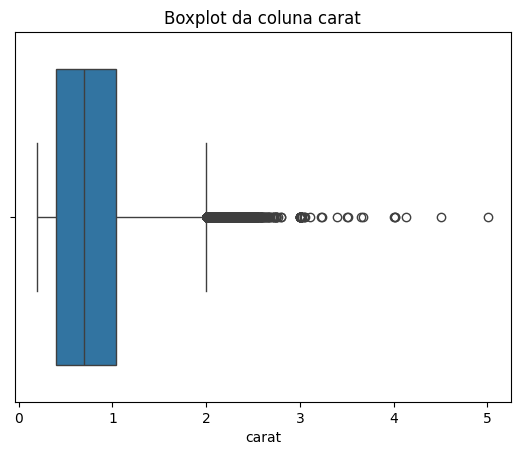

In [ ]:
sns.boxplot(data=df, x='carat')
plt.title('Boxplot da coluna carat')
plt.show()

### cut
#### tipo de dado

In [ ]:
print(df['cut'].dtype)

category


#### valores unicos

In [ ]:
print(df['cut'].nunique())


5


#### distribuição

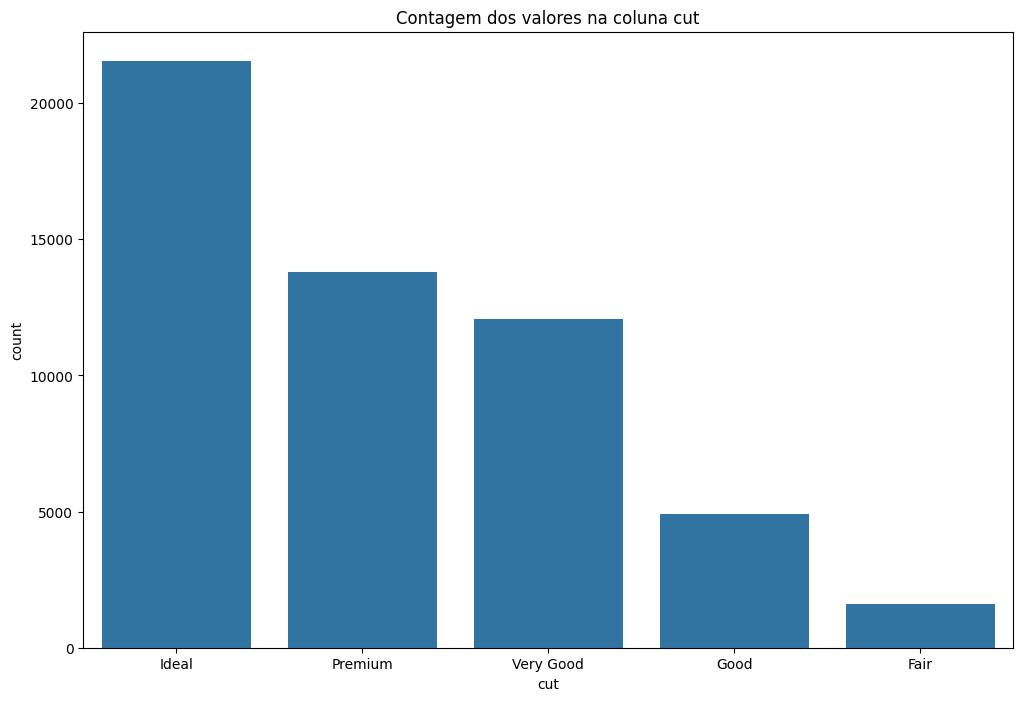

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='cut')
plt.title('Contagem dos valores na coluna cut')
plt.show()


#### histograma

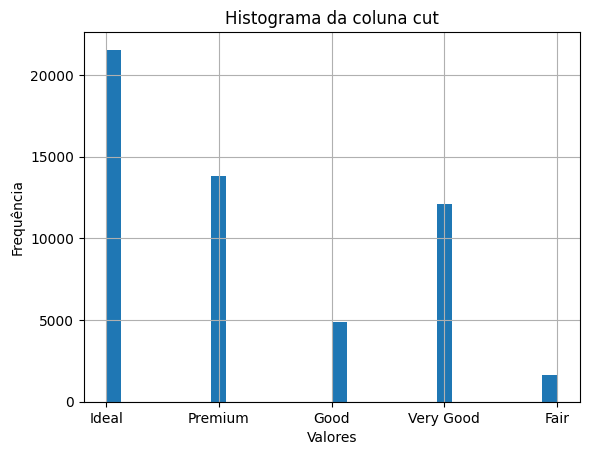

In [ ]:
df['cut'].hist(bins=30)
plt.title('Histograma da coluna cut')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

#### PIZZA

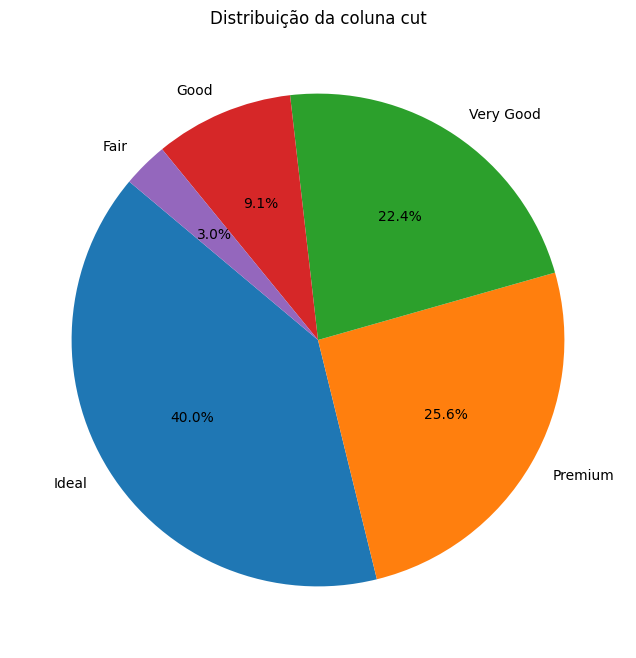

In [ ]:
conta = df['cut'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(conta, labels=conta.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição da coluna cut')
plt.show()


### color
#### tipo de dado

In [ ]:
print(df['color'].dtype)

category


#### valores unicos

In [ ]:
print(df['color'].nunique())


7


#### distribuição

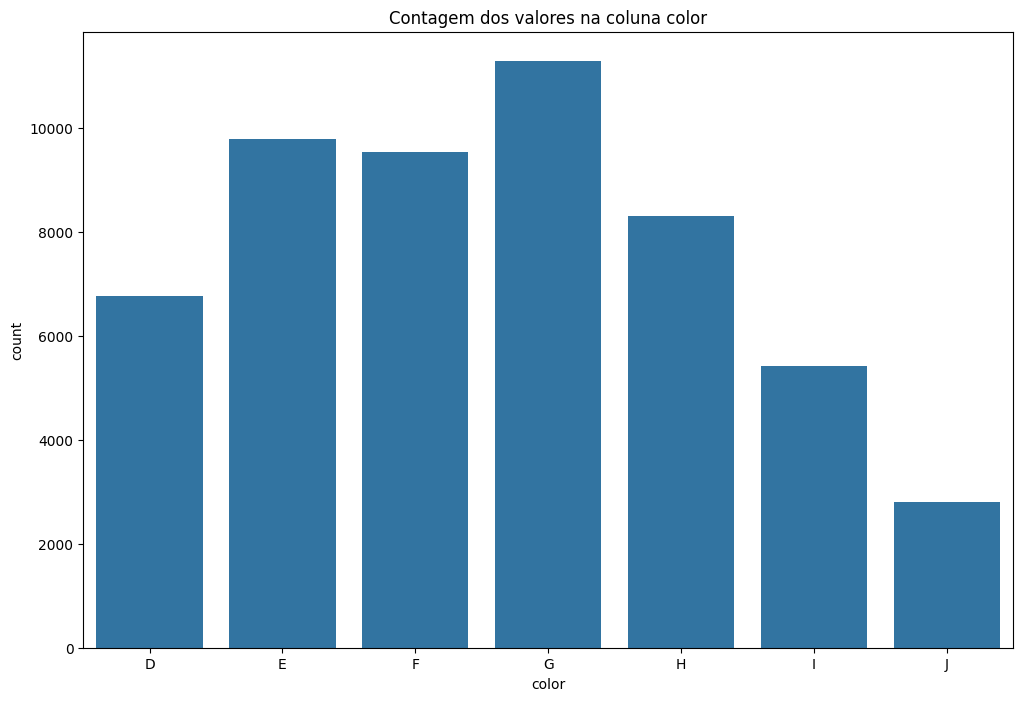

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='color')
plt.title('Contagem dos valores na coluna color')
plt.show()


#### histograma

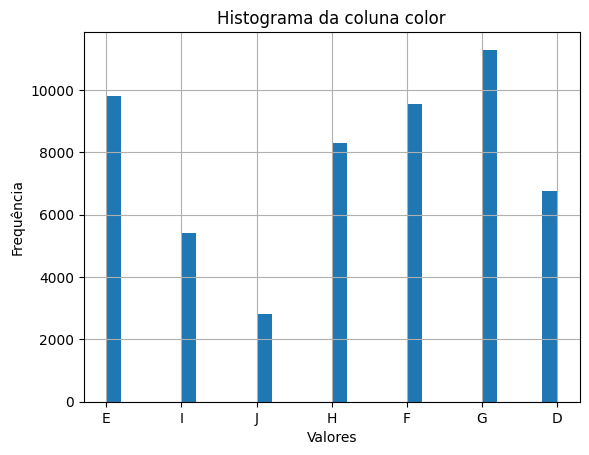

In [ ]:
df['color'].hist(bins=30)
plt.title('Histograma da coluna color')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

#### PIZZA

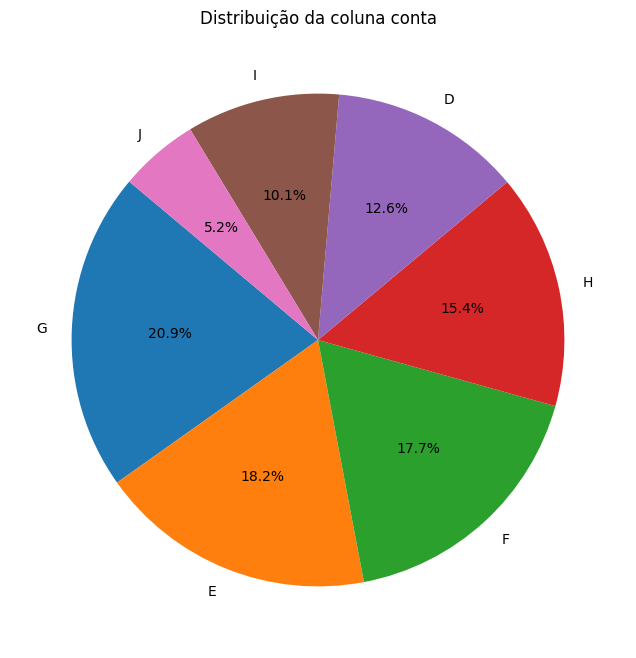

In [ ]:
conta = df['color'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(conta, labels=conta.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição da coluna conta')
plt.show()


### clarity
#### tipo de dado

In [ ]:
print(df['clarity'].dtype)

category


#### valores unicos

In [ ]:
print(df['clarity'].nunique())


8


#### distribuição

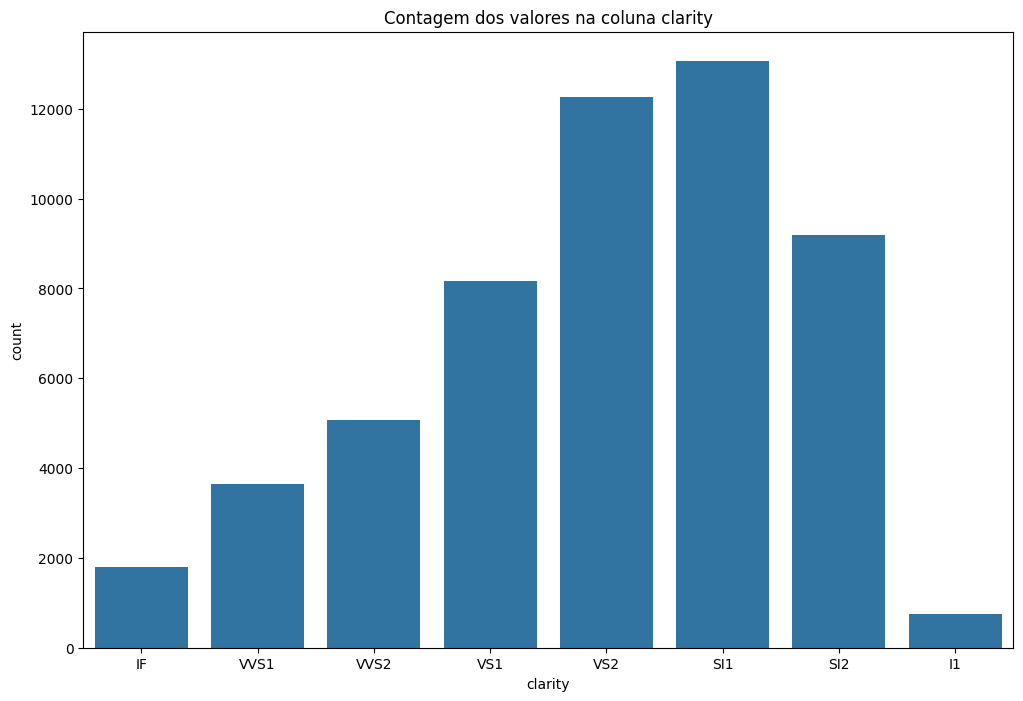

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='clarity')
plt.title('Contagem dos valores na coluna clarity')
plt.show()


#### histograma

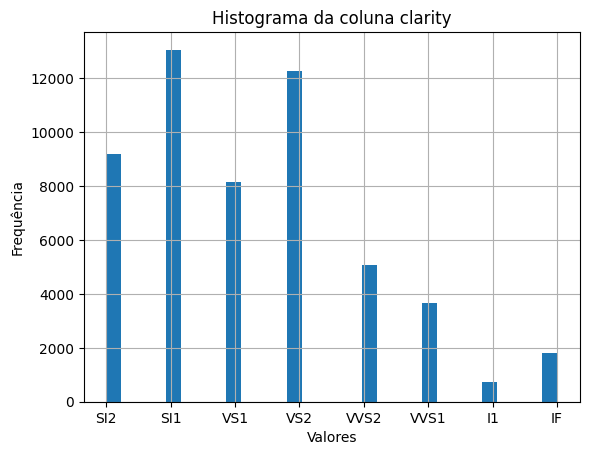

In [ ]:
df['clarity'].hist(bins=30)
plt.title('Histograma da coluna clarity')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

#### PIZZA

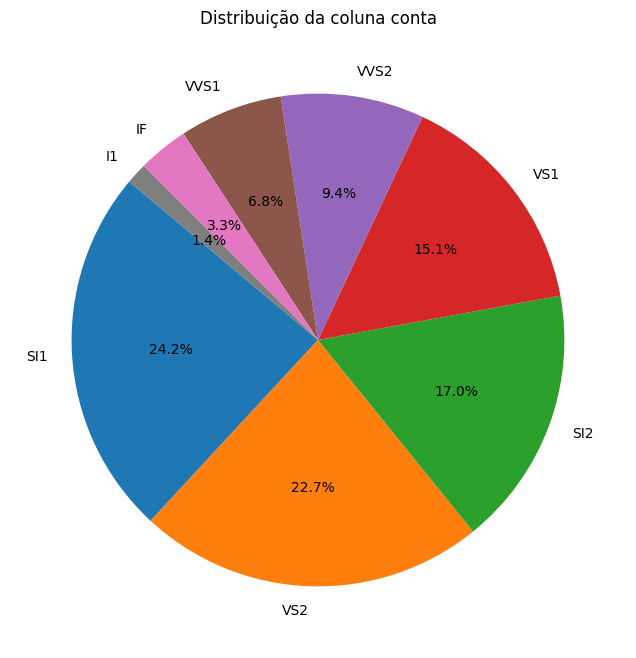

In [ ]:
conta = df['clarity'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(conta, labels=conta.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição da coluna conta')
plt.show()


### depth
#### tipo de dado

In [ ]:
print(df['depth'].dtype)

float64


#### valores unicos

In [ ]:
print(df['depth'].nunique())


184


#### distribuição

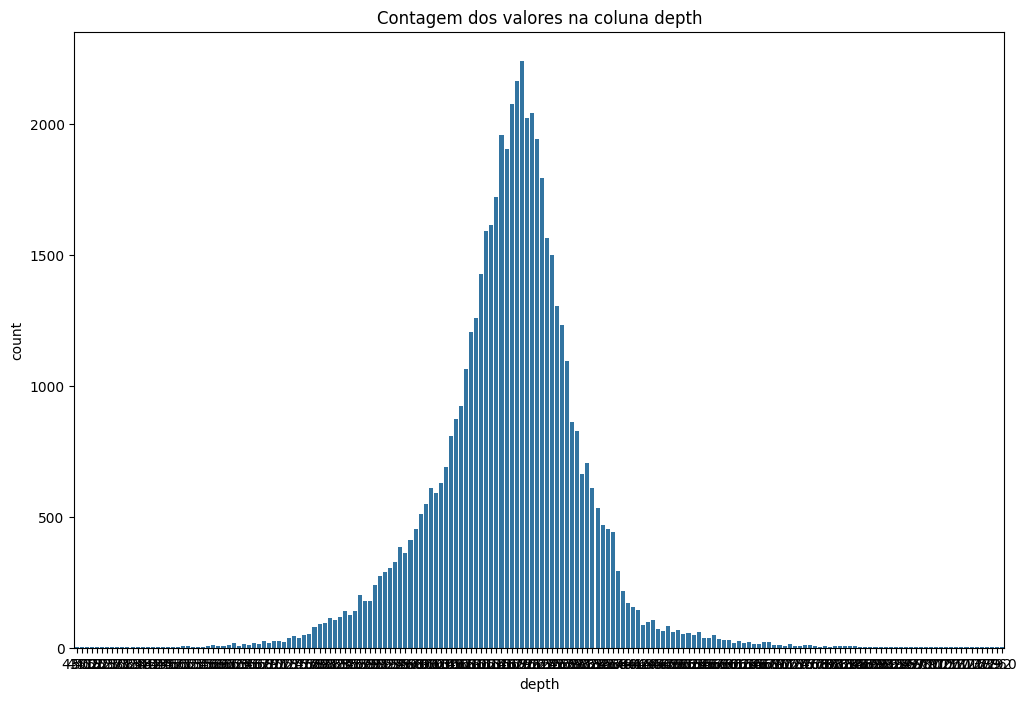

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='depth')
plt.title('Contagem dos valores na coluna depth')
plt.show()


#### histograma

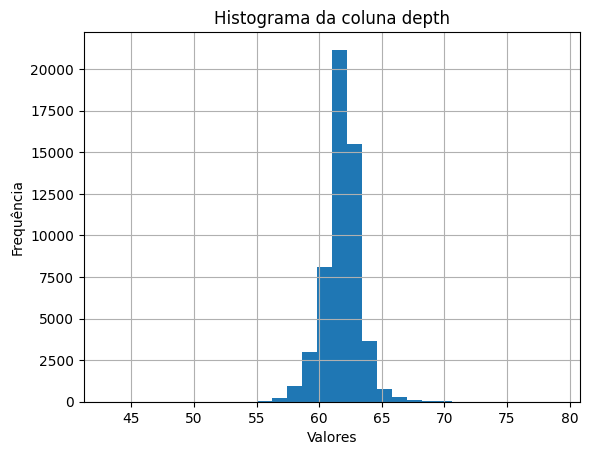

In [ ]:
df['depth'].hist(bins=30)
plt.title('Histograma da coluna depth')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

#### boxplot

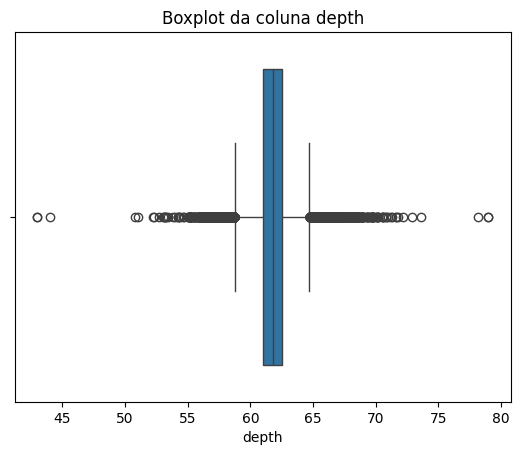

In [ ]:
sns.boxplot(data=df, x='depth')
plt.title('Boxplot da coluna depth')
plt.show()

### table
#### tipo de dado

In [ ]:
print(df['table'].dtype)

float64


#### valores unicos

In [ ]:
print(df['table'].nunique())


127


#### distribuição

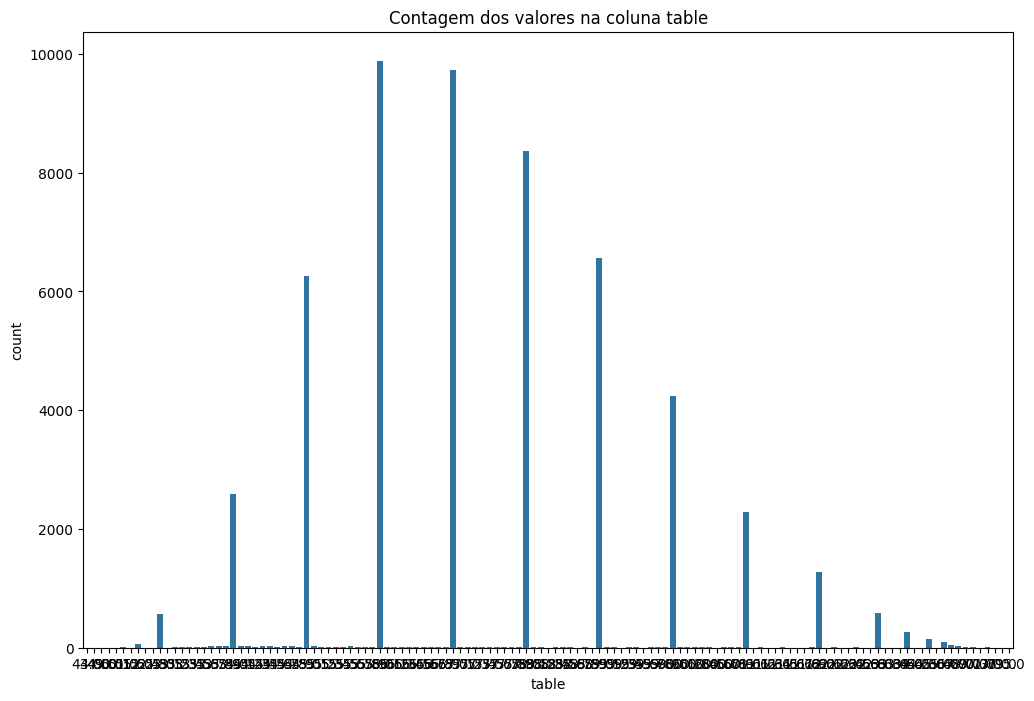

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='table')
plt.title('Contagem dos valores na coluna table')
plt.show()


#### histograma

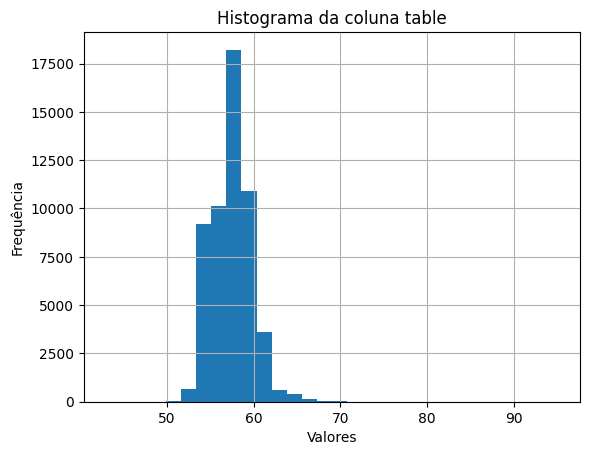

In [ ]:
df['table'].hist(bins=30)
plt.title('Histograma da coluna table')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

#### boxplot

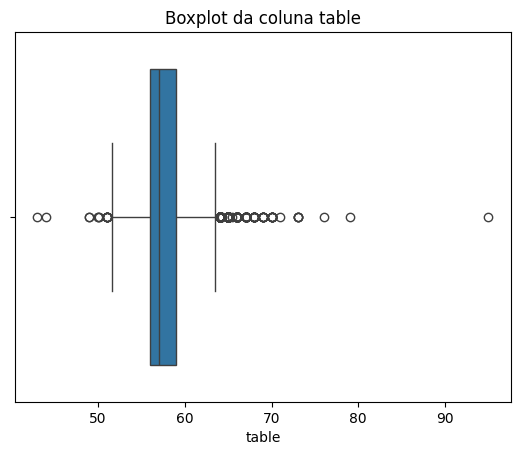

In [ ]:
sns.boxplot(data=df, x='table')
plt.title('Boxplot da coluna table')
plt.show()

### x
#### tipo de dado

In [ ]:
print(df['x'].dtype)

float64


#### valores unicos

In [ ]:
print(df['x'].nunique())


554


#### distribuição

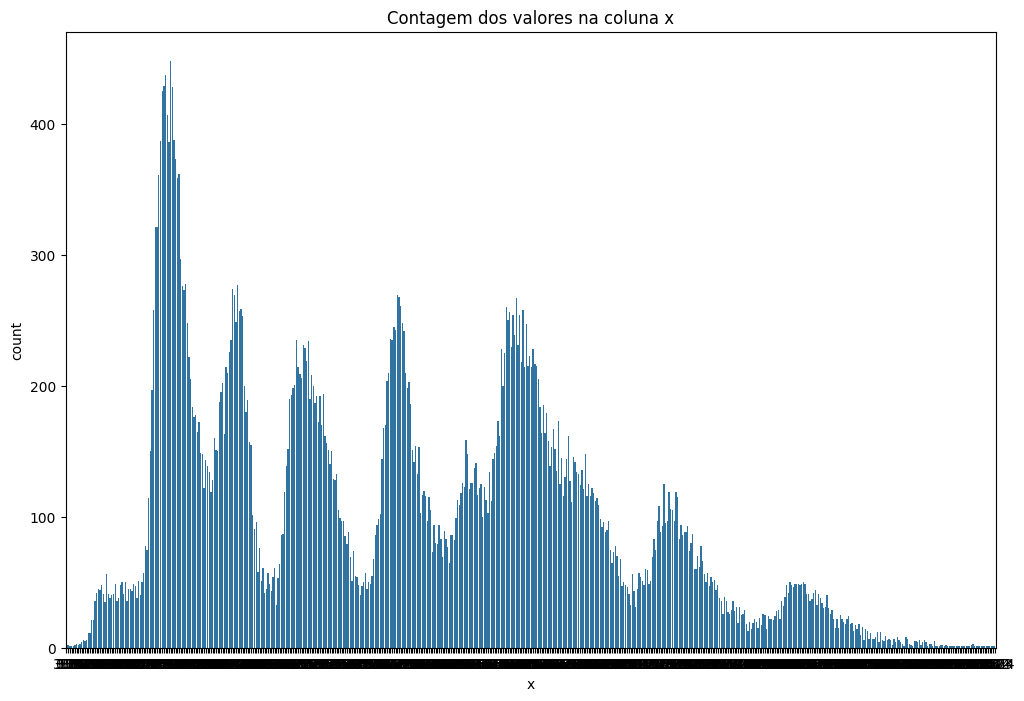

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='x')
plt.title('Contagem dos valores na coluna x')
plt.show()


#### histograma

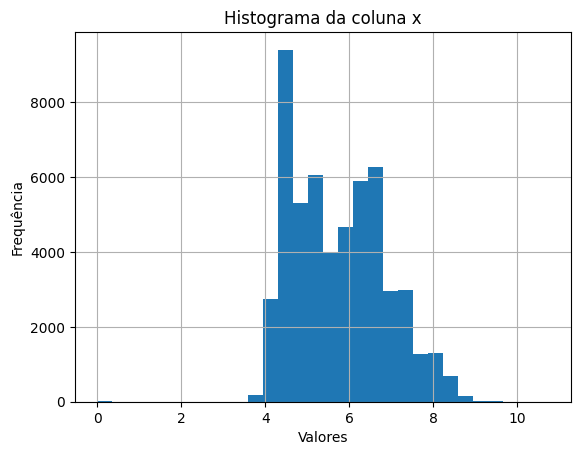

In [ ]:
df['x'].hist(bins=30)
plt.title('Histograma da coluna x')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

#### boxplot

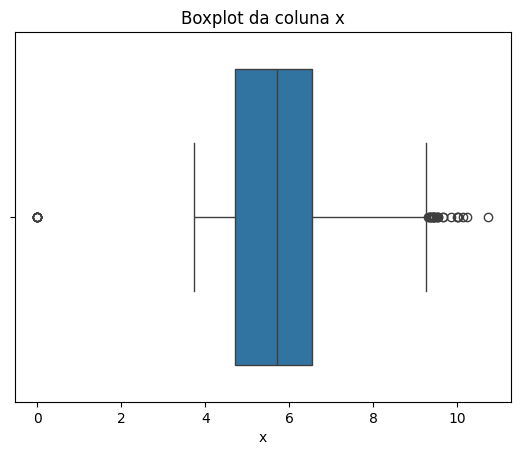

In [ ]:
sns.boxplot(data=df, x='x')
plt.title('Boxplot da coluna x')
plt.show()

### y
#### tipo de dado

In [ ]:
print(df['y'].dtype)

float64


#### valores unicos

In [ ]:
print(df['y'].nunique())


552


#### distribuição

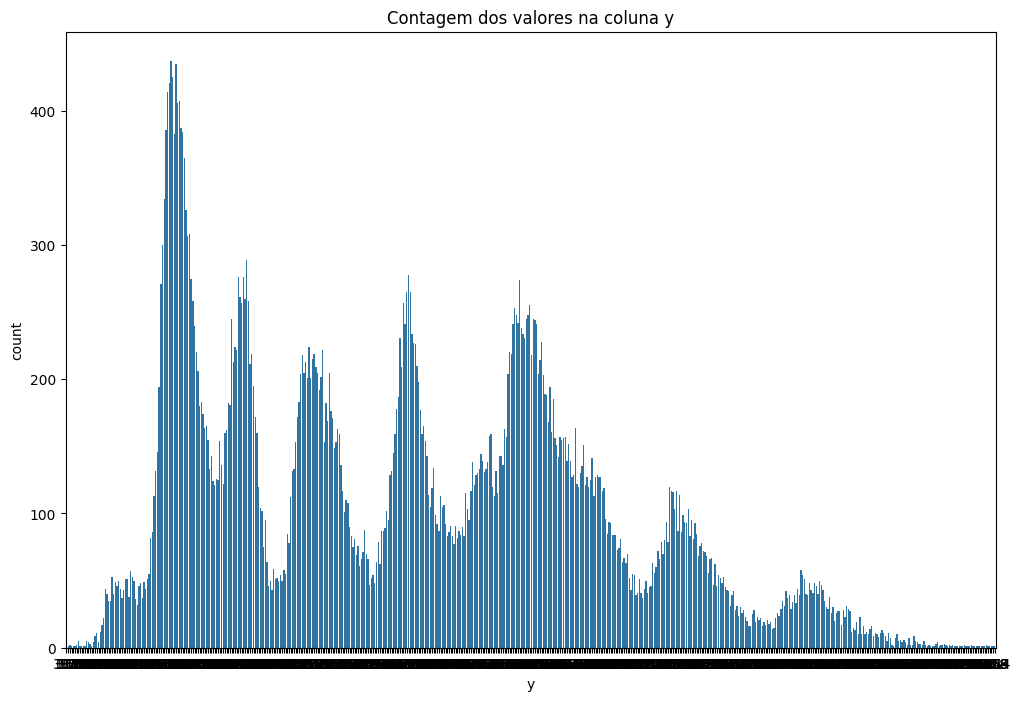

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='y')
plt.title('Contagem dos valores na coluna y')
plt.show()


#### histograma

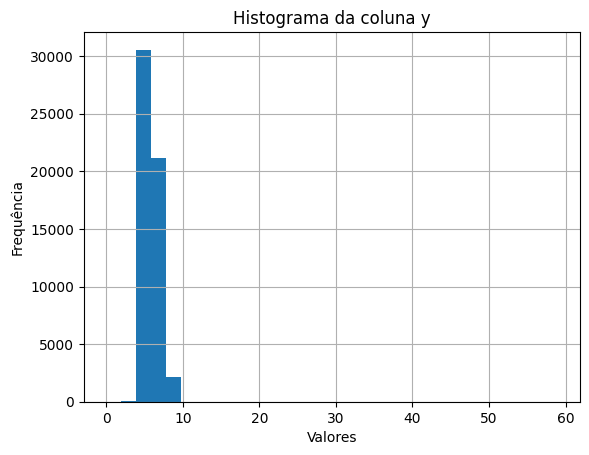

In [ ]:
df['y'].hist(bins=30)
plt.title('Histograma da coluna y')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

#### boxplot

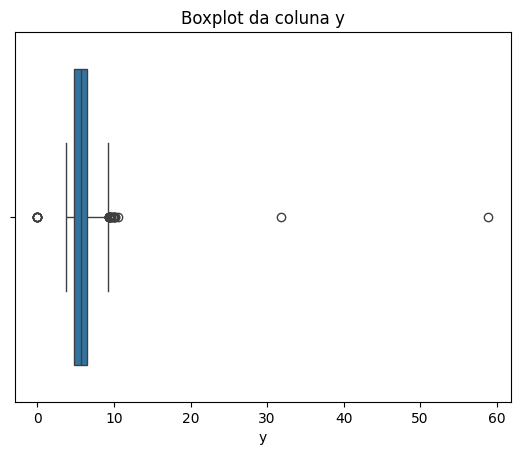

In [ ]:
sns.boxplot(data=df, x='y')
plt.title('Boxplot da coluna y')
plt.show()

### z
#### tipo de dado

In [ ]:
print(df['z'].dtype)

float64


#### valores unicos

In [ ]:
print(df['z'].nunique())


375


#### distribuição

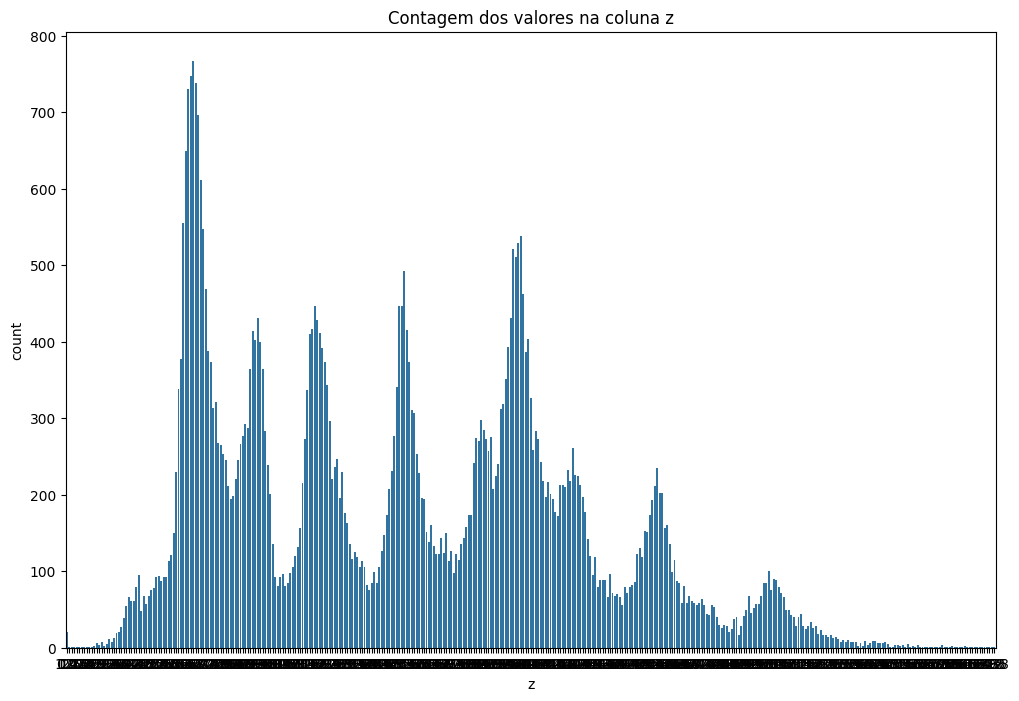

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='z')
plt.title('Contagem dos valores na coluna z')
plt.show()


#### histograma

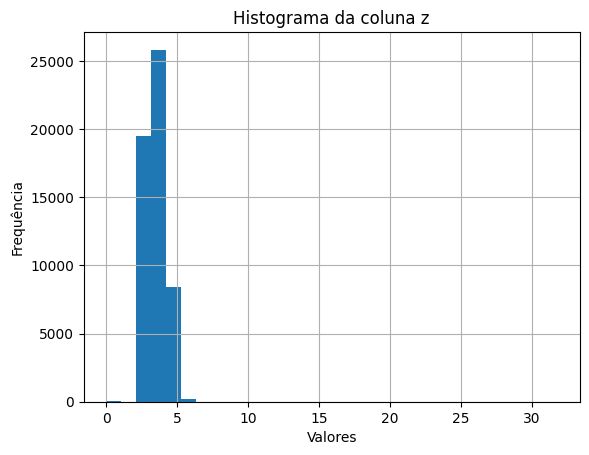

In [ ]:
df['z'].hist(bins=30)
plt.title('Histograma da coluna z')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

#### boxplot

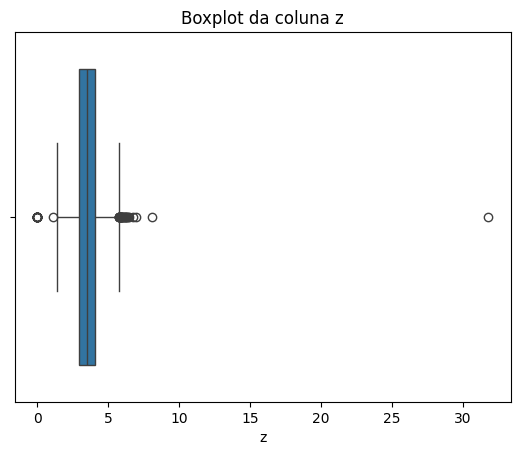

In [ ]:
sns.boxplot(data=df, x='z')
plt.title('Boxplot da coluna z')
plt.show()

### Matriz de correlação

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


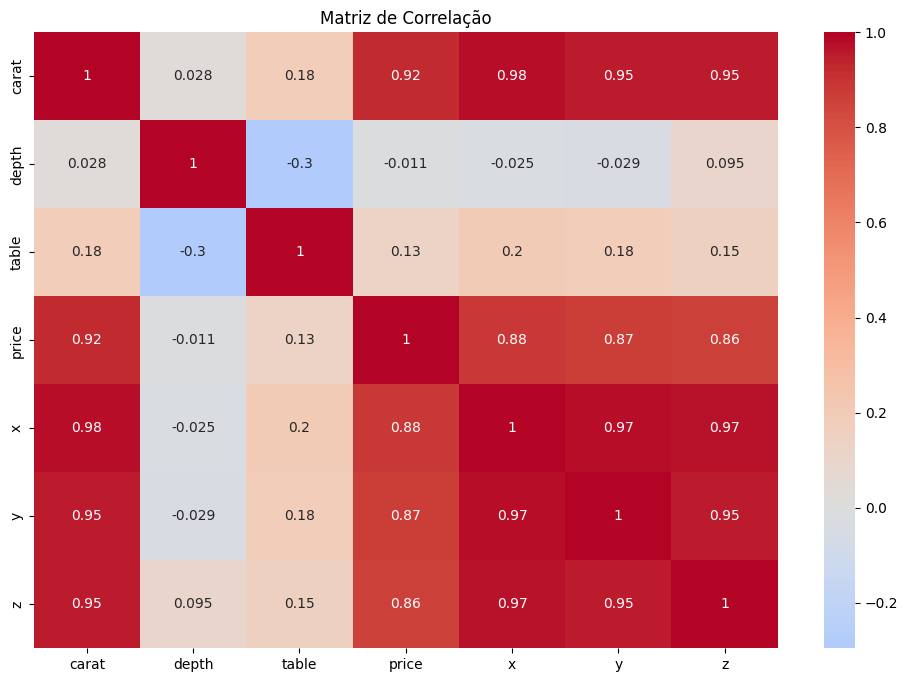

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

### Scatter plots entre features numéricas + target

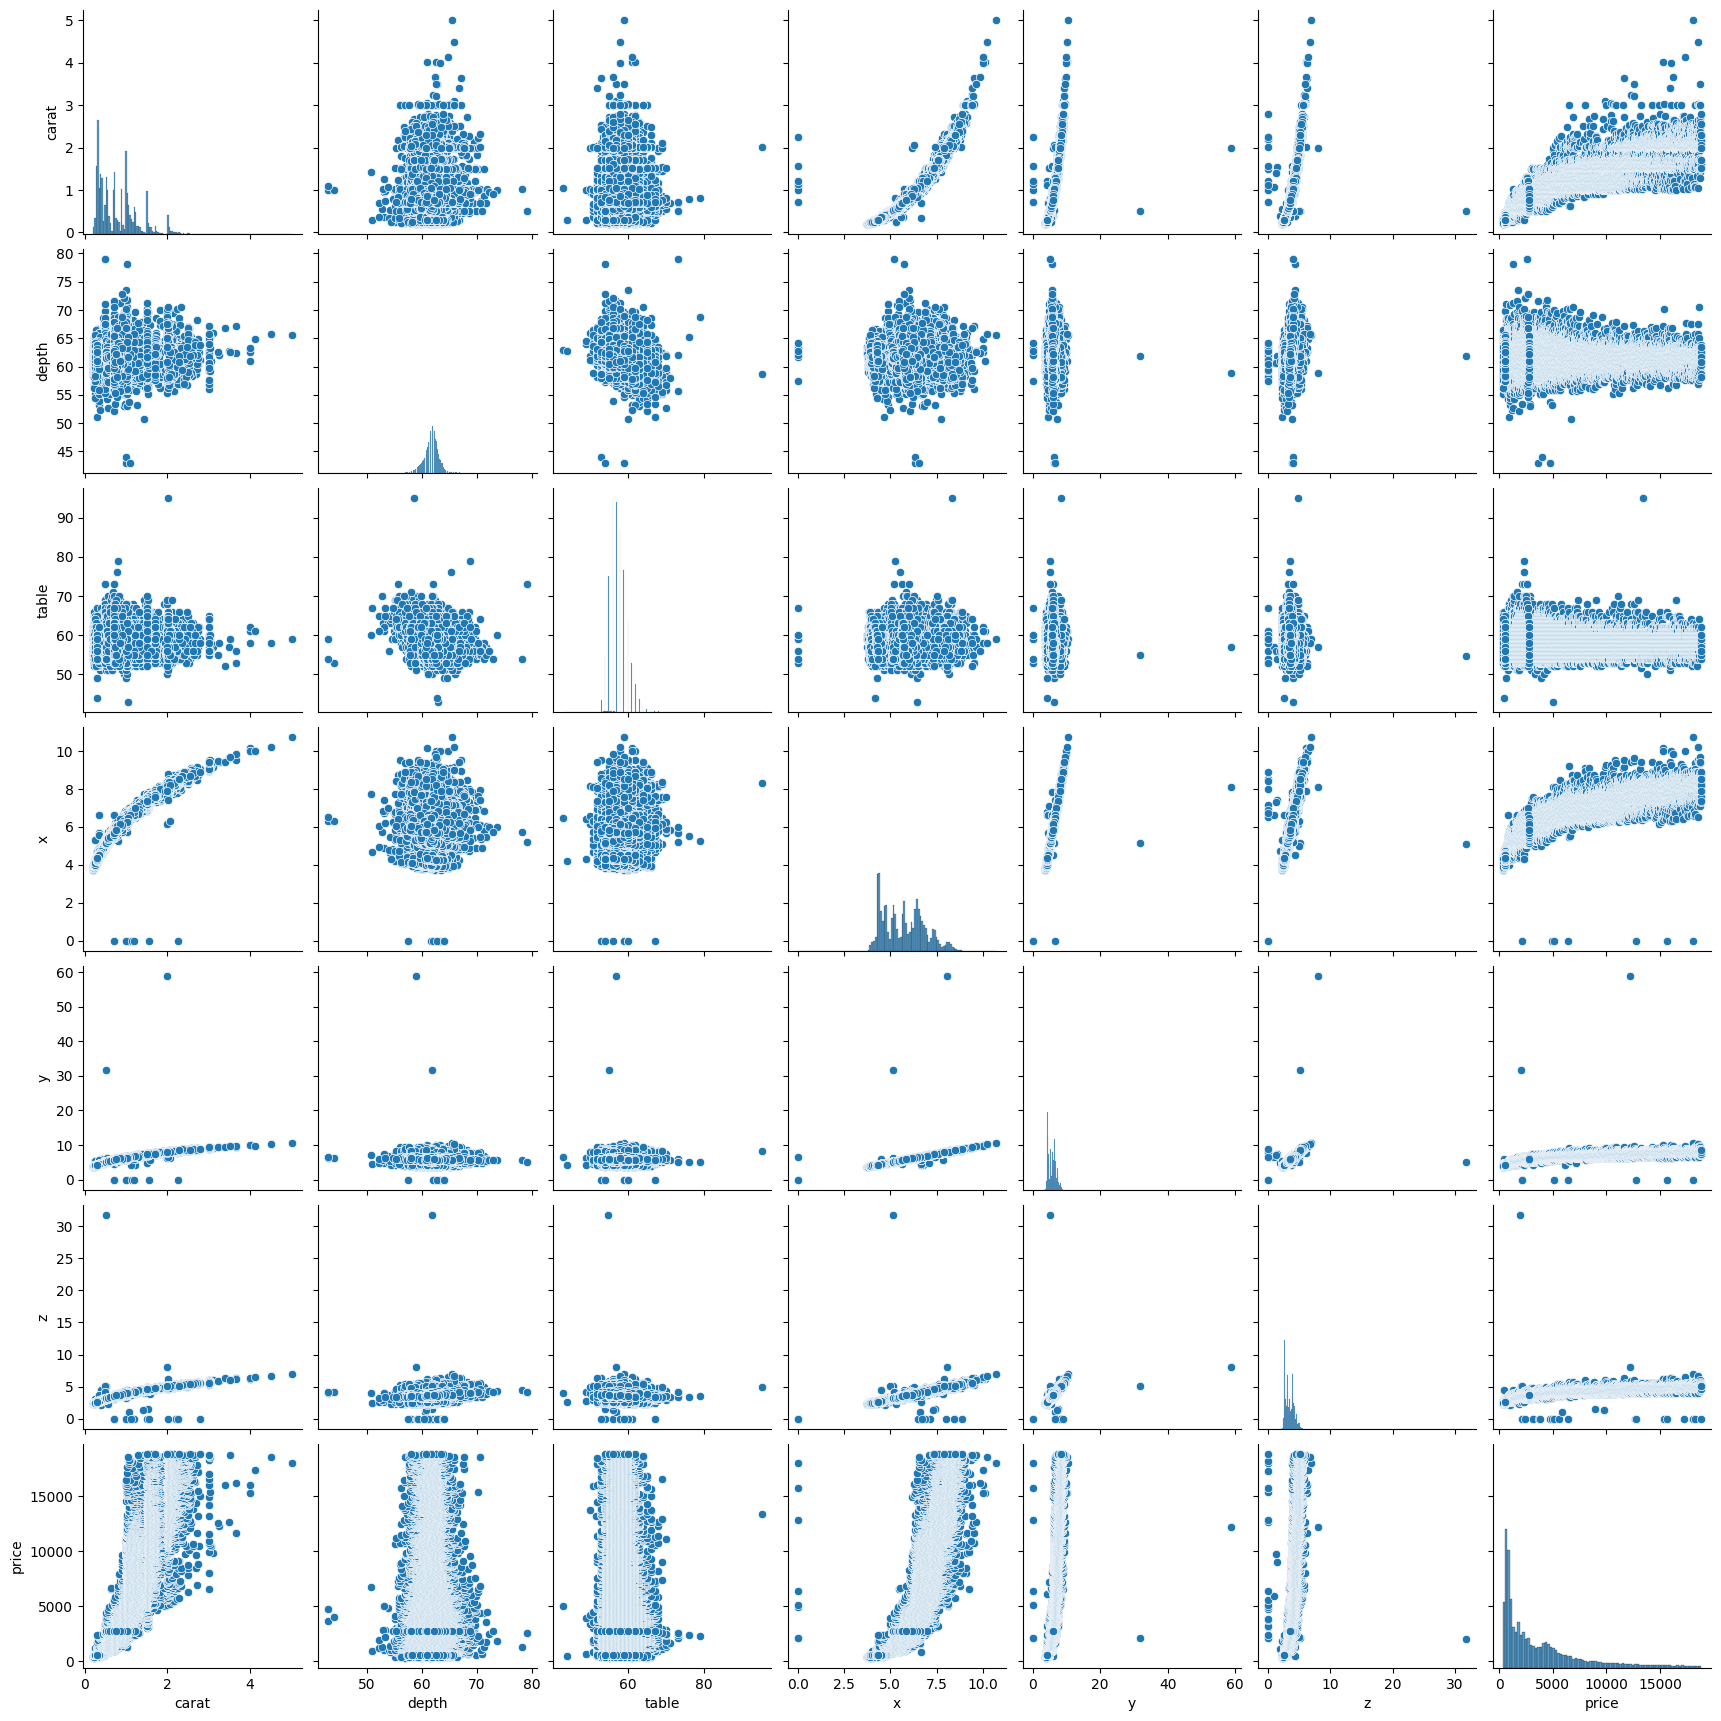

In [ ]:
colunas = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
sns.pairplot(df[colunas])
plt.show()